   # Credit Card Approval

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# A)

In [2]:
app_df = pd.read_csv('application_record.csv')


## UNDERSTANDING THE DATASET


In [3]:
app_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
column_name_mapping = {
    'CODE_GENDER': 'Gender',
    'FLAG_OWN_CAR': 'Own_car',
    'FLAG_OWN_REALTY': 'Own_property',
    'CNT_CHILDREN': 'Children_cnt',
    'AMT_INCOME_TOTAL': 'Income',
    'NAME_INCOME_TYPE': 'Income_source',
    'NAME_EDUCATION_TYPE': 'Education',
    'NAME_FAMILY_STATUS': 'Family_status',
    'NAME_HOUSING_TYPE': 'Housing_type',
    'DAYS_BIRTH': 'Age',
    'DAYS_EMPLOYED': 'Experience',
    'FLAG_MOBIL': 'Mobile',
    'FLAG_WORK_PHONE': 'Work_phone',
    'FLAG_PHONE': 'Phone',
    'FLAG_EMAIL': 'Email',
    'OCCUPATION_TYPE': 'Occupation_type',
    'CNT_FAM_MEMBERS': 'Family_size'
}

app_df.rename(columns=column_name_mapping, inplace=True)

app_df.head(5)

,ID,Gender,Own_car,Own_property,Children_cnt,Income,Income_source,Education,Family_status,Housing_type,Age,Experience,Mobile,Work_phone,Phone,Email,Occupation_type,Family_size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               438557 non-null  int64  
 1   Gender           438557 non-null  object 
 2   Own_car          438557 non-null  object 
 3   Own_property     438557 non-null  object 
 4   Children_cnt     438557 non-null  int64  
 5   Income           438557 non-null  float64
 6   Income_source    438557 non-null  object 
 7   Education        438557 non-null  object 
 8   Family_status    438557 non-null  object 
 9   Housing_type     438557 non-null  object 
 10  Age              438557 non-null  int64  
 11  Experience       438557 non-null  int64  
 12  Mobile           438557 non-null  int64  
 13  Work_phone       438557 non-null  int64  
 14  Phone            438557 non-null  int64  
 15  Email            438557 non-null  int64  
 16  Occupation_type  304354 non-null  obje

In [6]:
missing_values = app_df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
ID                      0
Gender                  0
Own_car                 0
Own_property            0
Children_cnt            0
Income                  0
Income_source           0
Education               0
Family_status           0
Housing_type            0
Age                     0
Experience              0
Mobile                  0
Work_phone              0
Phone                   0
Email                   0
Occupation_type    134203
Family_size             0
dtype: int64


In [7]:
categorical_columns = app_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(app_df[col].value_counts())


Unique values in Gender:
F    294440
M    144117
Name: Gender, dtype: int64

Unique values in Own_car:
N    275459
Y    163098
Name: Own_car, dtype: int64

Unique values in Own_property:
Y    304074
N    134483
Name: Own_property, dtype: int64

Unique values in Income_source:
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: Income_source, dtype: int64

Unique values in Education:
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: Education, dtype: int64

Unique values in Family_status:
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: Family_status, dtype: int64

Unique values in Housing_type:
House / apartment   

In [8]:
# Select numerical columns
numerical_columns = app_df.select_dtypes(include=['int64', 'float64'])

# Display the list of numerical columns
print(numerical_columns.columns)

Index(['ID', 'Children_cnt', 'Income', 'Age', 'Experience', 'Mobile',
       'Work_phone', 'Phone', 'Email', 'Family_size'],
      dtype='object')


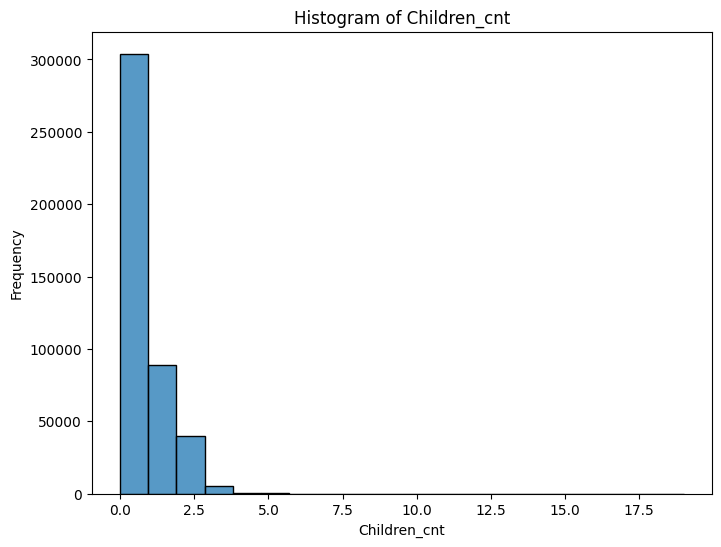

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data=app_df, x='Children_cnt', bins=20)
plt.title("Histogram of Children_cnt")
plt.xlabel("Children_cnt")
plt.ylabel("Frequency")
plt.show()

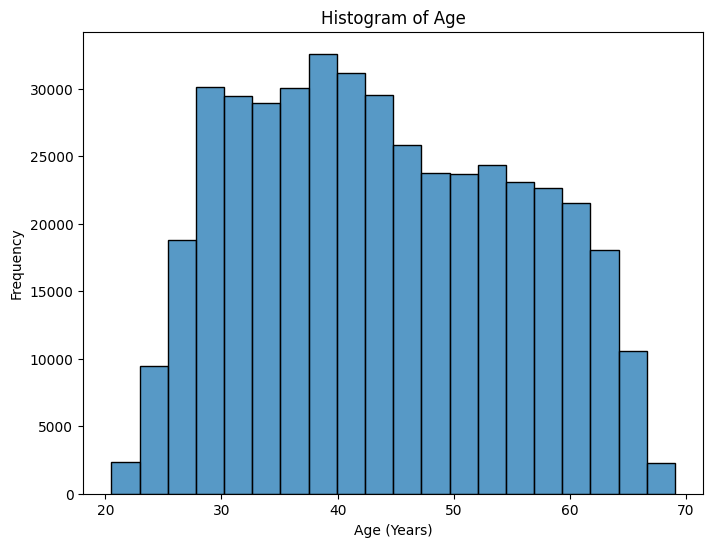

In [10]:
app_df['Age'] = app_df['Age'] / -365

# Create and display a histogram of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(data=app_df, x='Age', bins=20)
plt.title("Histogram of Age")
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.show()

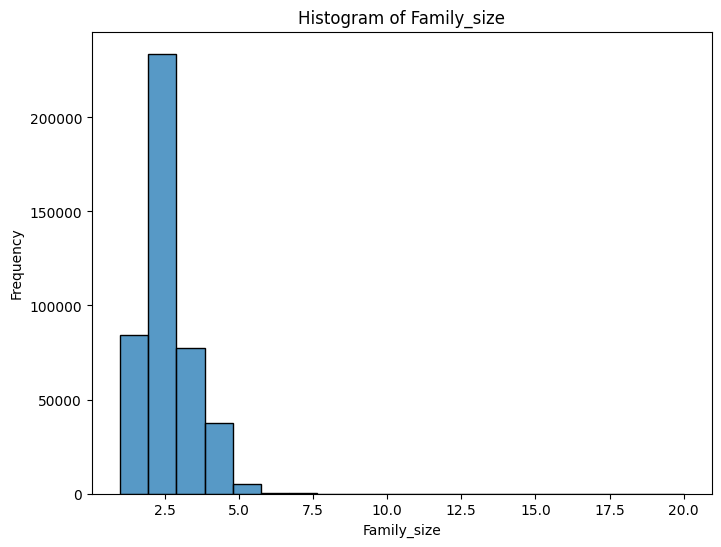

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=app_df, x='Family_size', bins=20)
plt.title("Histogram of Family_size")
plt.xlabel("Family_size")
plt.ylabel("Frequency")
plt.show()

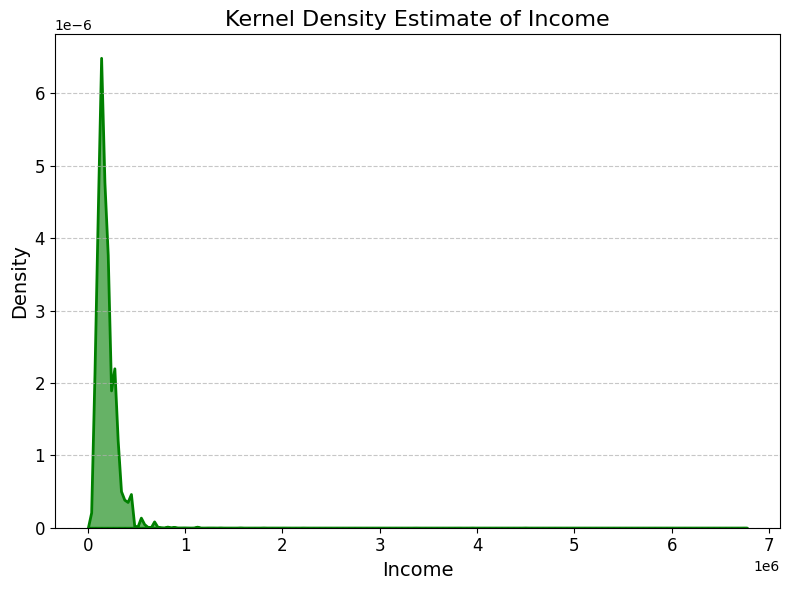

In [12]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=app_df, x='Income', fill=True, color='green', linewidth=2, alpha=0.6)

# Customize plot elements
plt.title("Kernel Density Estimate of Income", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

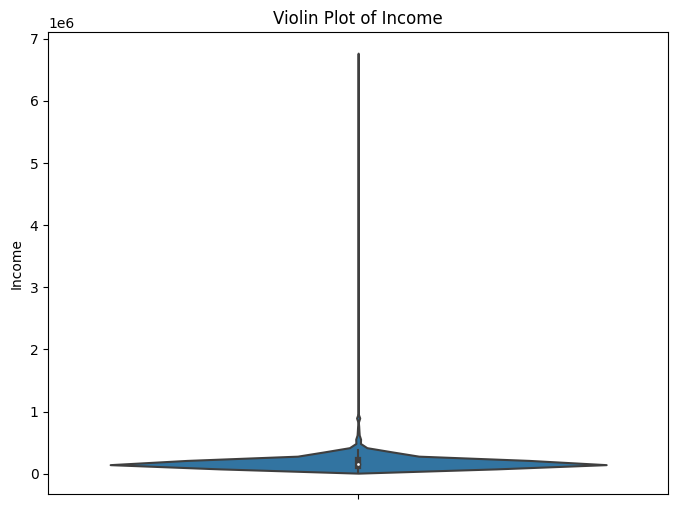

In [13]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=app_df, y='Income')
plt.title("Violin Plot of Income")
plt.ylabel("Income")
plt.show()

/tmp/ipykernel_39802/3228792583.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = app_df.corr()


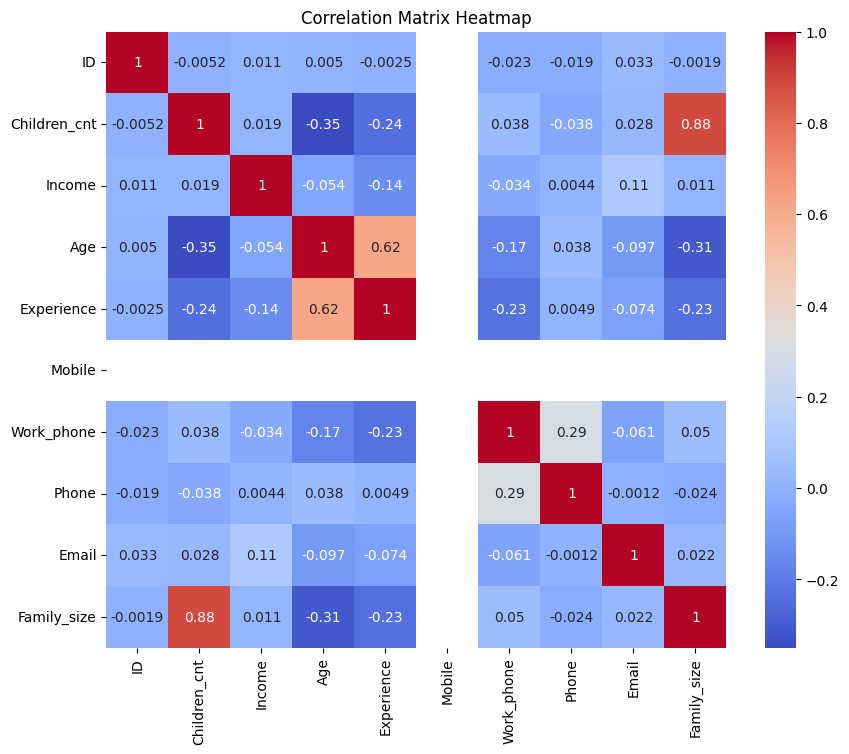

In [14]:
correlation_matrix = app_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

## PRE-PROCESSING

### Handling missing values

In [15]:
print(missing_values)

ID                      0
Gender                  0
Own_car                 0
Own_property            0
Children_cnt            0
Income                  0
Income_source           0
Education               0
Family_status           0
Housing_type            0
Age                     0
Experience              0
Mobile                  0
Work_phone              0
Phone                   0
Email                   0
Occupation_type    134203
Family_size             0
dtype: int64


In [16]:
occupation_counts = app_df['Occupation_type'].value_counts(dropna=False)
print(occupation_counts)

NaN                      134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: Occupation_type, dtype: int64


In [17]:
flag_value = 'Unknown'  
app_df['Occupation_type'].fillna(flag_value, inplace=True)

app_df.head(5)

,ID,Gender,Own_car,Own_property,Children_cnt,Income,Income_source,Education,Family_status,Housing_type,Age,Experience,Mobile,Work_phone,Phone,Email,Occupation_type,Family_size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Unknown,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Unknown,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-3051,1,0,1,1,Sales staff,1.0


In [18]:
app_df['Mobile'].nunique()

1

### The columnn "Children_cnt" is highly correlated with the column "Family_size".
### The column "Mobile" has only one value in it

In [19]:
app_df.drop(['Children_cnt','Mobile'], axis = 1, inplace= True)


In [20]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               438557 non-null  int64  
 1   Gender           438557 non-null  object 
 2   Own_car          438557 non-null  object 
 3   Own_property     438557 non-null  object 
 4   Income           438557 non-null  float64
 5   Income_source    438557 non-null  object 
 6   Education        438557 non-null  object 
 7   Family_status    438557 non-null  object 
 8   Housing_type     438557 non-null  object 
 9   Age              438557 non-null  float64
 10  Experience       438557 non-null  int64  
 11  Work_phone       438557 non-null  int64  
 12  Phone            438557 non-null  int64  
 13  Email            438557 non-null  int64  
 14  Occupation_type  438557 non-null  object 
 15  Family_size      438557 non-null  float64
dtypes: float64(3), int64(5), object(8)
mem

### Encoding

In [21]:
# Find categorical columns
categorical_columns = app_df.select_dtypes(include=['object', 'category']).columns

# Display the list of categorical columns
print(categorical_columns.tolist())

['Gender', 'Own_car', 'Own_property', 'Income_source', 'Education', 'Family_status', 'Housing_type', 'Occupation_type']


In [22]:
from sklearn.preprocessing import LabelEncoder
# List of categorical columns to label encode
categorical_columns = ['Gender', 'Own_car', 'Own_property', 'Income_source', 'Education', 'Family_status', 'Housing_type', 'Occupation_type']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode the categorical columns
for col in categorical_columns:
    app_df[col] = label_encoder.fit_transform(app_df[col])


# Display the updated DataFrame
app_df.head()

,ID,Gender,Own_car,Own_property,Income,Income_source,Education,Family_status,Housing_type,Age,Experience,Work_phone,Phone,Email,Occupation_type,Family_size
0,5008804,1,1,1,427500.0,4,1,0,4,32.890411,-4542,1,0,0,17,2.0
1,5008805,1,1,1,427500.0,4,1,0,4,32.890411,-4542,1,0,0,17,2.0
2,5008806,1,1,1,112500.0,4,4,1,1,58.832877,-1134,0,0,0,16,2.0
3,5008808,0,0,1,270000.0,0,4,3,1,52.356164,-3051,0,1,1,14,1.0
4,5008809,0,0,1,270000.0,0,4,3,1,52.356164,-3051,0,1,1,14,1.0


In [23]:
# original_categorical_values = label_encoder.inverse_transform(app_df['Gender'])
# print(original_categorical_values)

In [24]:
app_df['Experience']=app_df['Experience']/-365

In [25]:
import math
# Apply floor function and convert to integer for 'Age' and 'Experience' columns
app_df['Age'] = app_df['Age'].apply(lambda x: int(math.floor(x)))
app_df['Experience'] = app_df['Experience'].apply(lambda x: int(math.floor(x)))

# Display the updated DataFrame
app_df.head()

,ID,Gender,Own_car,Own_property,Income,Income_source,Education,Family_status,Housing_type,Age,Experience,Work_phone,Phone,Email,Occupation_type,Family_size
0,5008804,1,1,1,427500.0,4,1,0,4,32,12,1,0,0,17,2.0
1,5008805,1,1,1,427500.0,4,1,0,4,32,12,1,0,0,17,2.0
2,5008806,1,1,1,112500.0,4,4,1,1,58,3,0,0,0,16,2.0
3,5008808,0,0,1,270000.0,0,4,3,1,52,8,0,1,1,14,1.0
4,5008809,0,0,1,270000.0,0,4,3,1,52,8,0,1,1,14,1.0


## Feature Scaling

--Numerical columns with binary values do not require scaling. There is one income column which might need it. Whether to scale it or not will be decide on TRY AND ERROR METHOD based on model performance

## Outliers detection and handling

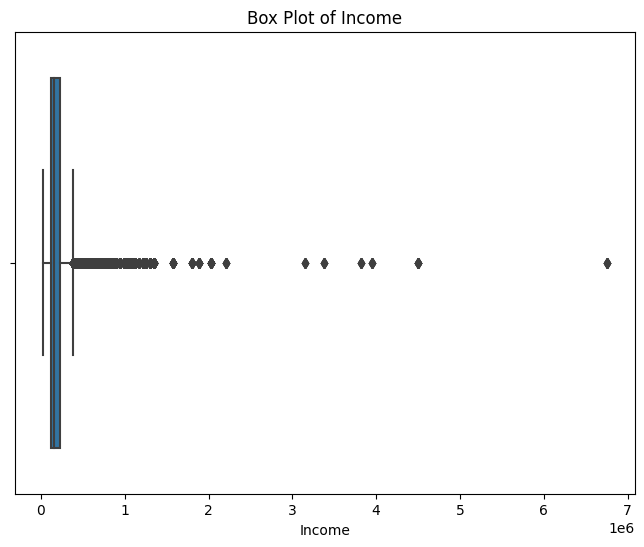

In [26]:
column_to_plot = 'Income'

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=app_df, x=column_to_plot)
plt.title("Box Plot of " + column_to_plot)
plt.xlabel(column_to_plot)
plt.show()

In [27]:
column_to_analyze = 'Income'

# Calculate Q1, Q3, and IQR
Q1 = app_df[column_to_analyze].quantile(0.25)
Q3 = app_df[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Count the number of outlier values
outliers_count = app_df[(app_df[column_to_analyze] > upper_bound) | (app_df[column_to_analyze] < lower_bound)].shape[0]

# Display the number of outlier values
print("Number of outliers in", column_to_analyze, ":", outliers_count)

Number of outliers in Income : 19108


In [28]:
print(app_df['Income'].max())

6750000.0


In [29]:
# Count the records with values more than 100,000
count_above_threshold = app_df[app_df[column_to_analyze] > upper_bound].shape[0]

# Display the count
print("Number of records with income > Upper bound:", count_above_threshold)

Number of records with income > Upper bound: 19108


#### There are less than 1% values as outliers in the income column. These can be removed

In [30]:
# Remove outliers
app_df = app_df[(app_df['Income'] >= lower_bound) & (app_df['Income'] <= upper_bound)]

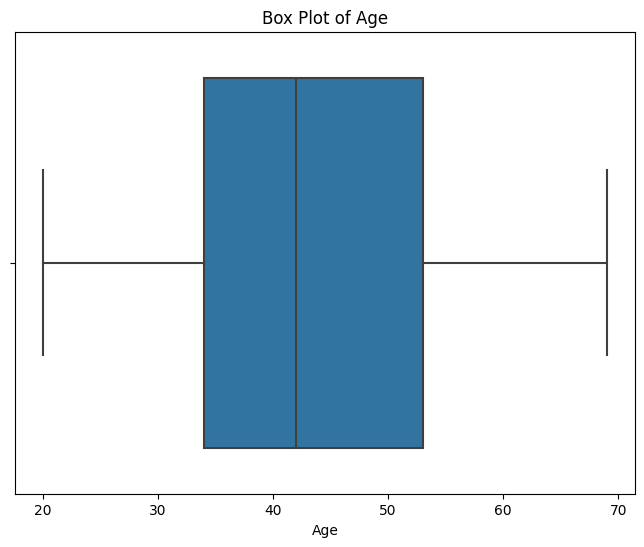

In [31]:
column_to_plot = 'Age'

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=app_df, x=column_to_plot)
plt.title("Box Plot of " + column_to_plot)
plt.xlabel(column_to_plot)
plt.show()

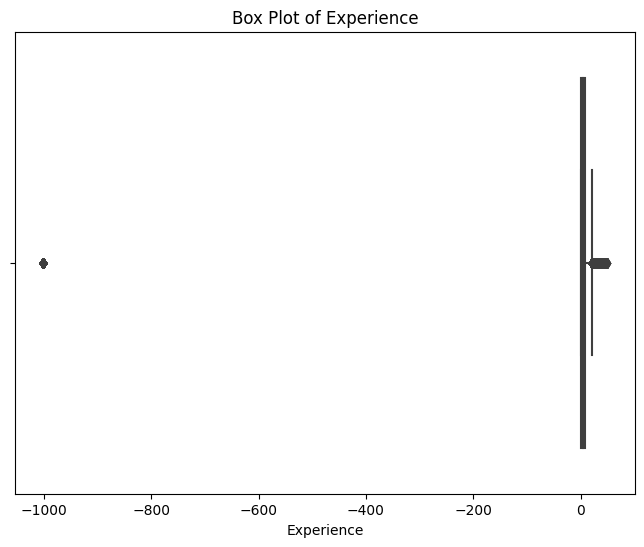

In [32]:
column_to_plot = 'Experience'

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=app_df, x=column_to_plot)
plt.title("Box Plot of " + column_to_plot)
plt.xlabel(column_to_plot)
plt.show()

In [33]:
column_to_analyze = 'Experience'

# Calculate Q1, Q3, and IQR
Q1 = app_df[column_to_analyze].quantile(0.25)
Q3 = app_df[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Count the number of outlier values
outliers_count = app_df[(app_df[column_to_analyze] > upper_bound) | (app_df[column_to_analyze] < lower_bound)].shape[0]

# Display the number of outlier values
print("Number of outliers in", column_to_analyze, ":", outliers_count)

Number of outliers in Experience : 91513


In [34]:
# Count the records with values more than 100,000
count_below_threshold = app_df[app_df['Experience'] < 0].shape[0]

# Display the count
print("Number of records with income < 0:", count_below_threshold)

Number of records with income < 0: 73802


In [35]:
column_to_handle = 'Experience'

# Define the minimum value to cap at (e.g., 0)
min_cap_value = 0

# Cap the outliers below the minimum value
app_df[column_to_handle] = app_df[column_to_handle].apply(lambda x: min_cap_value if x < min_cap_value else x)

##### Experience cannot be below 0. So keeping it as threshold, it is found that almost 73800 values are outliers

## Feature Engineering

-- As a part of Feature Transformations, the columns AGE and EXPERIENCE are already created in the prior process.

## Dimensionality Reduction
##### Is it needed??

# B)

In [36]:
credit_df = pd.read_csv('credit_record.csv')

In [37]:
credit_df.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [38]:
credit_df.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [39]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [40]:
credit_df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [41]:
credit_df['STATUS'].nunique()
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [42]:
credit_df['ID'].nunique()

45985

In [43]:
column_name_mapping = {
    'MONTHS_BALANCE': 'Due_past',
    'STATUS': 'Status'
}

credit_df.rename(columns=column_name_mapping, inplace=True)

credit_df.head(5)

,ID,Due_past,Status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


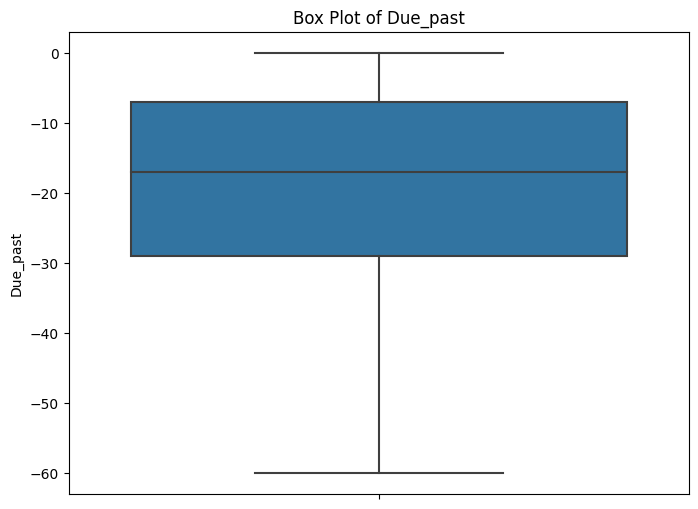

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_df, y='Due_past')
plt.title("Box Plot of Due_past")
plt.ylabel("Due_past")
plt.show()

In [45]:
credit_df['STATUS_BINARY'] = credit_df['Status']
credit_df = credit_df.replace({'STATUS_BINARY' :{'C' : 'Good','X' : 'Good','0' : 'Bad', '1' : 'Bad','2' : 'Bad','3' : 'Bad','4' : 'Bad','5' : 'Bad'}})
result_df = credit_df.value_counts(subset=['ID', 'STATUS_BINARY']).unstack(fill_value=0).reset_index()


In [46]:
credit_df['Due_past'].min()

-60

In [47]:
result_df.loc[(result_df['Good'] / result_df['Bad'] >= 1), 'Status'] = 1
result_df.loc[(result_df['Good'] / result_df['Bad'] < 1 ), 'Status'] = 0
result_df['Status'] = result_df['Status'].astype(int)

In [48]:
result_df.head(5)

STATUS_BINARY,ID,Bad,Good,Status
0,5001711,3,1,0
1,5001712,10,9,0
2,5001713,0,22,1
3,5001714,0,15,1
4,5001715,0,60,1


In [49]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      45985 non-null  int64
 1   Bad     45985 non-null  int64
 2   Good    45985 non-null  int64
 3   Status  45985 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


## MERGING THE DATASET

In [50]:
df = app_df.merge(result_df, how='inner', on=['ID'])

In [51]:
df['Good_Rate'] = (df['Good']+1) / (df['Bad']+df['Good']+1)
df['Good_Rate'] = df['Good_Rate'].round(2) 

df.drop(['Good','Bad'],axis=1,inplace = True);

In [52]:
df['Family_size'] = df['Family_size'].astype(int)

In [53]:
df.head(4)

,ID,Gender,Own_car,Own_property,Income,Income_source,Education,Family_status,Housing_type,Age,Experience,Work_phone,Phone,Email,Occupation_type,Family_size,Status,Good_Rate
0,5008806,1,1,1,112500.0,4,4,1,1,58,3,0,0,0,16,2,1,0.77
1,5008808,0,0,1,270000.0,0,4,3,1,52,8,0,1,1,14,1,1,0.67
2,5008809,0,0,1,270000.0,0,4,3,1,52,8,0,1,1,14,1,1,1.00
3,5008810,0,0,1,270000.0,0,4,3,1,52,8,0,1,1,14,1,1,0.79


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34928 entries, 0 to 34927
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               34928 non-null  int64  
 1   Gender           34928 non-null  int64  
 2   Own_car          34928 non-null  int64  
 3   Own_property     34928 non-null  int64  
 4   Income           34928 non-null  float64
 5   Income_source    34928 non-null  int64  
 6   Education        34928 non-null  int64  
 7   Family_status    34928 non-null  int64  
 8   Housing_type     34928 non-null  int64  
 9   Age              34928 non-null  int64  
 10  Experience       34928 non-null  int64  
 11  Work_phone       34928 non-null  int64  
 12  Phone            34928 non-null  int64  
 13  Email            34928 non-null  int64  
 14  Occupation_type  34928 non-null  int64  
 15  Family_size      34928 non-null  int64  
 16  Status           34928 non-null  int64  
 17  Good_Rate   

#  Exploratory Data Analysis (EDA) 

In [55]:
 df.describe()

,ID,Gender,Own_car,Own_property,Income,Income_source,Education,Family_status,Housing_type,Age,Experience,Work_phone,Phone,Email,Occupation_type,Family_size,Status,Good_Rate
count,3.492800e+04,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000,34928.000000
mean,5.078209e+06,0.322435,0.369761,0.669492,172742.036604,2.413508,3.134963,1.369360,1.283154,43.261023,5.568140,0.226008,0.291657,0.087008,10.607306,2.193856,0.555056,0.559701
std,4.185109e+04,0.467415,0.482747,0.470403,71227.005679,1.727894,1.323476,0.959122,0.952799,11.585068,6.442146,0.418250,0.454532,0.281850,5.635485,0.910462,0.496967,0.313199
min,5.008806e+06,0.000000,0.000000,0.000000,27000.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.020000
25%,5.042022e+06,0.000000,0.000000,0.000000,117000.000000,1.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.250000
50%,5.074541e+06,0.000000,0.000000,1.000000,157500.000000,4.000000,4.000000,1.000000,1.000000,42.000000,4.000000,0.000000,0.000000,0.000000,10.000000,2.000000,1.000000,0.600000
75%,5.115416e+06,1.000000,1.000000,1.000000,225000.000000,4.000000,4.000000,1.000000,1.000000,53.000000,8.000000,0.000000,1.000000,0.000000,17.000000,3.000000,1.000000,0.830000
max,5.150487e+06,1.000000,1.000000,1.000000,378000.000000,4.000000,4.000000,4.000000,5.000000,68.000000,43.000000,1.000000,1.000000,1.000000,18.000000,20.000000,1.000000,1.000000


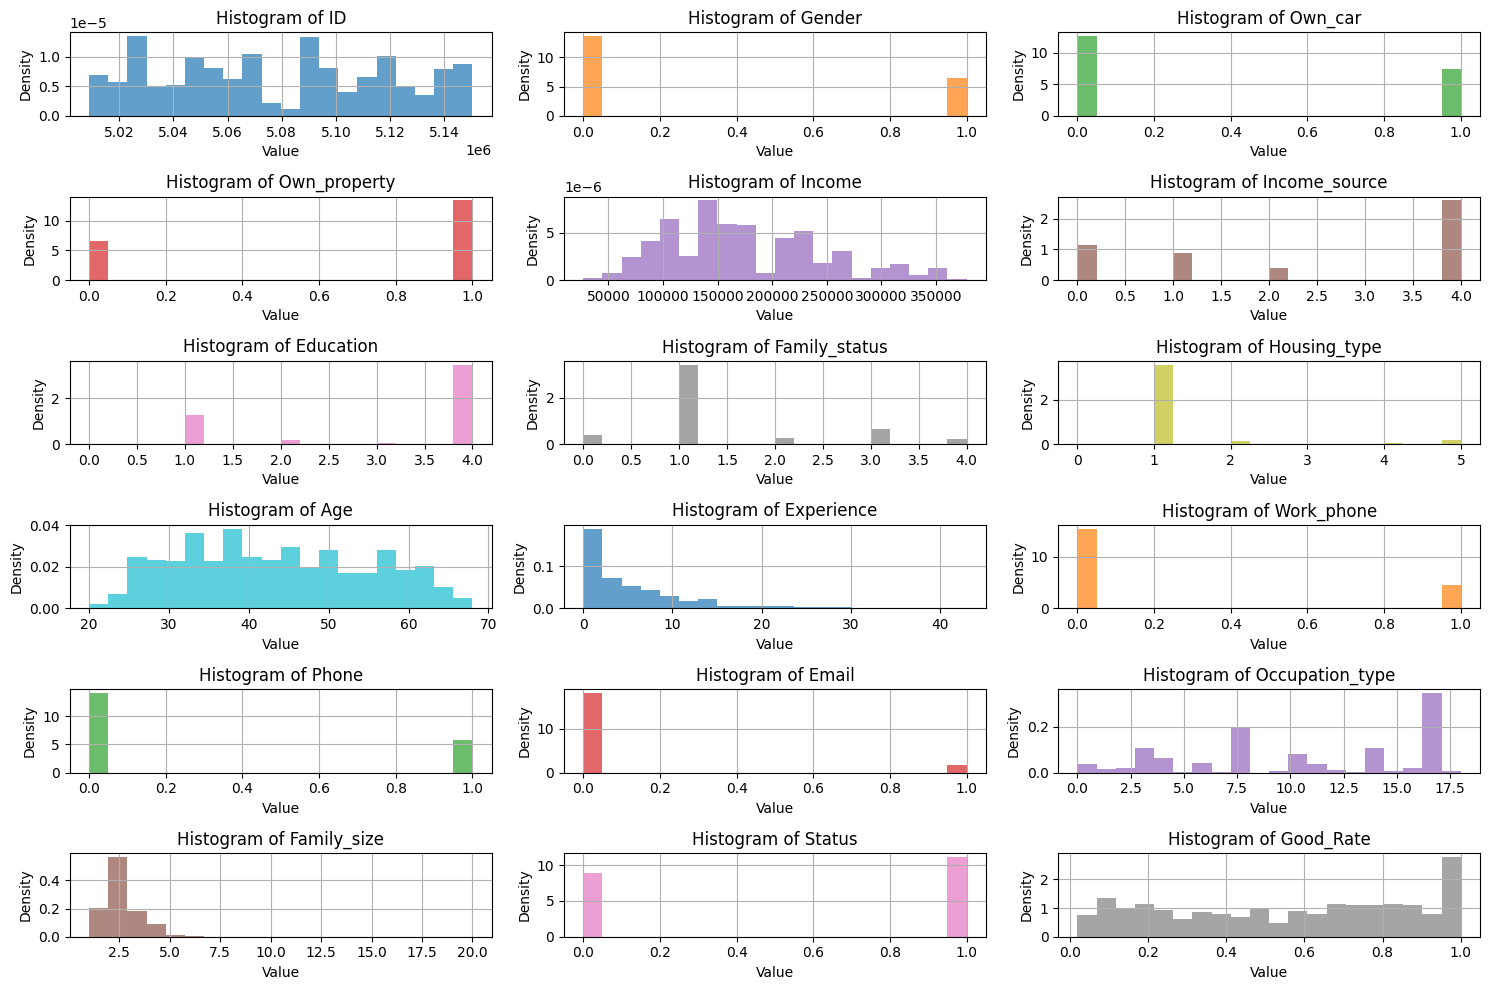

In [56]:
import matplotlib.pyplot as plt

# Define custom colors for the histograms
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Columns to plot
columns_to_plot = ['ID', 'Gender', 'Own_car', 'Own_property', 'Income', 'Income_source', 'Education', 'Family_status',
                   'Housing_type', 'Age', 'Experience', 'Work_phone', 'Phone', 'Email', 'Occupation_type', 'Family_size',
                   'Status', 'Good_Rate']

# Create subplots for each column
num_columns = len(columns_to_plot)
num_rows = (num_columns - 1) // 3 + 1
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 10))

# Plot histograms
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    df[column].hist(ax=axes[row, col], bins=20, color=colors[i], density=True, alpha=0.7)
    axes[row, col].set_title(f"Histogram of {column}")
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Density")

# Adjust layout to make the histograms more compact
plt.tight_layout()

# Show the plot
plt.show()



In [57]:
df.columns.tolist()

['ID',
 'Gender',
 'Own_car',
 'Own_property',
 'Income',
 'Income_source',
 'Education',
 'Family_status',
 'Housing_type',
 'Age',
 'Experience',
 'Work_phone',
 'Phone',
 'Email',
 'Occupation_type',
 'Family_size',
 'Status',
 'Good_Rate']

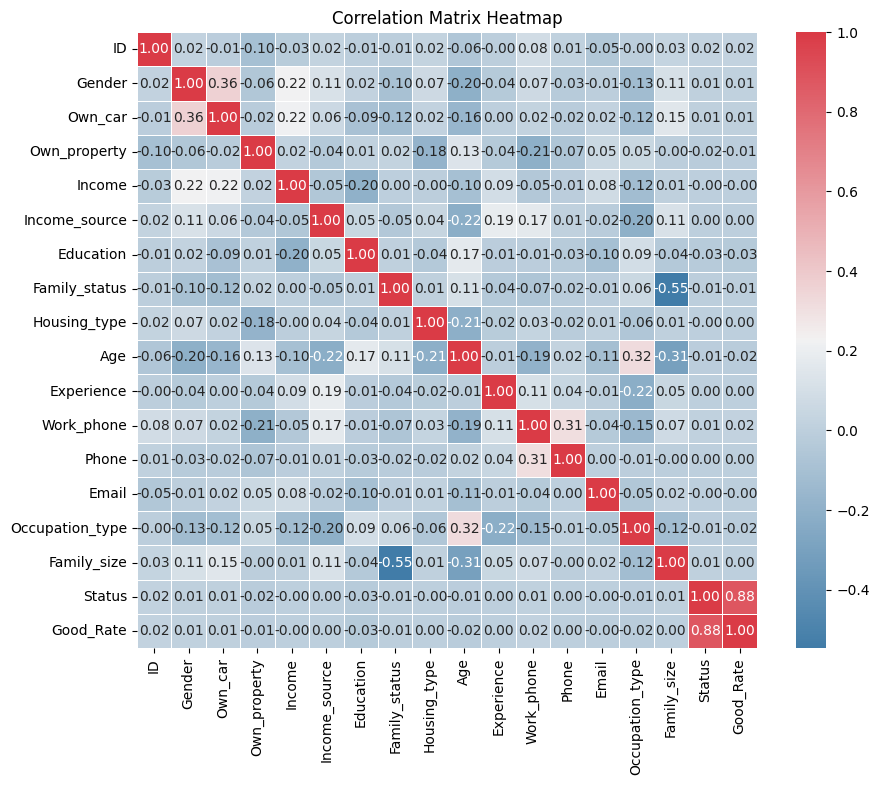

In [58]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the color palette for the heatmap
color_palette = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=color_palette, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

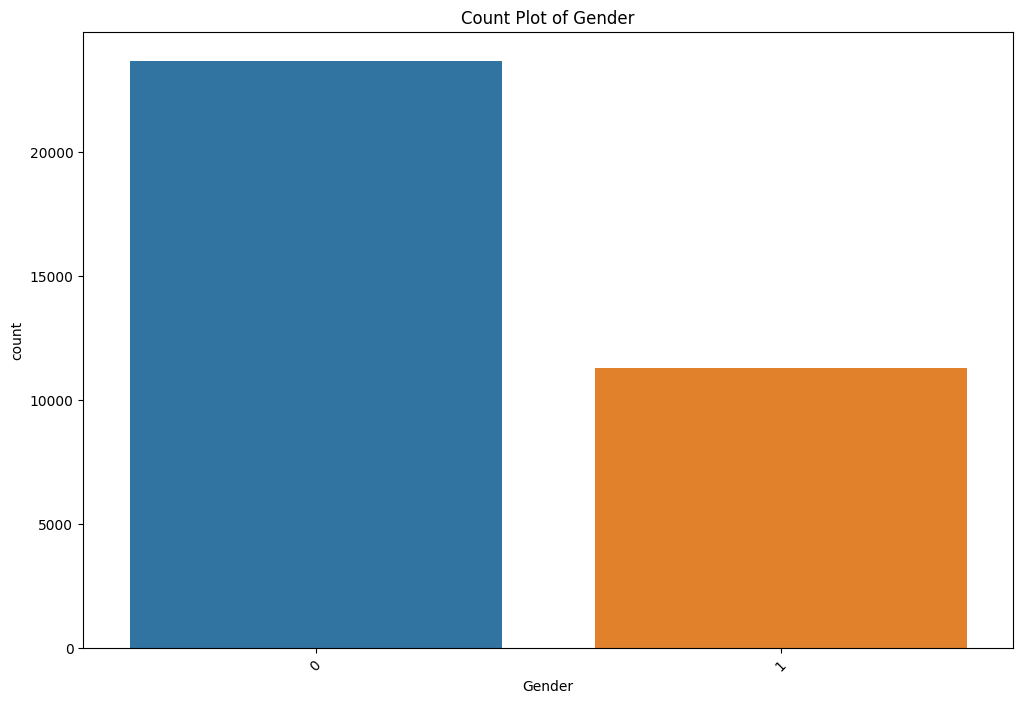

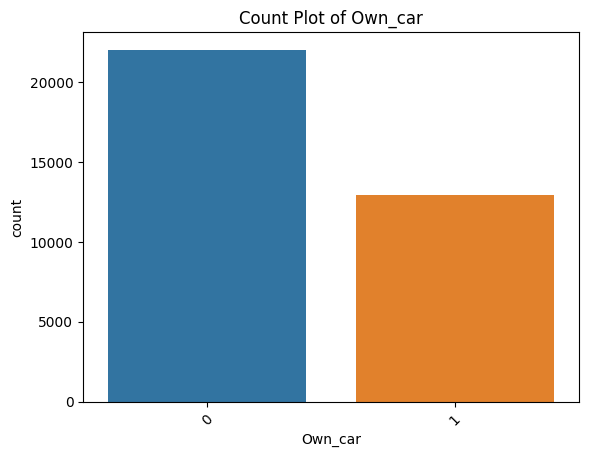

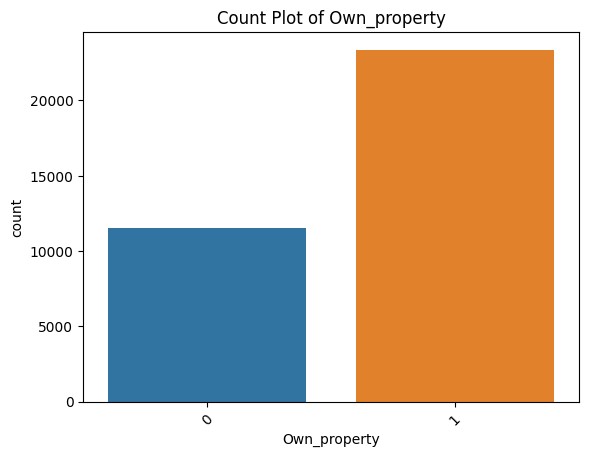

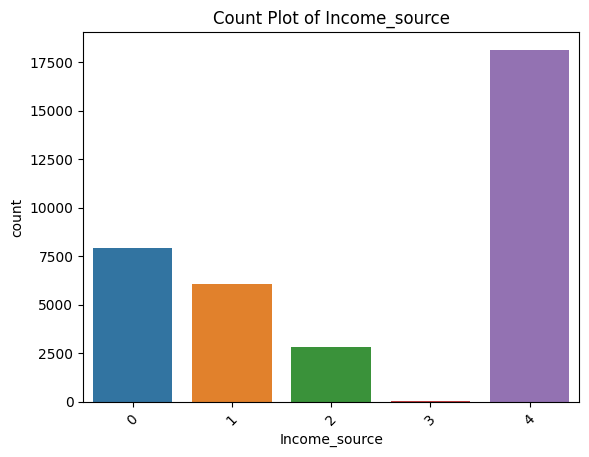

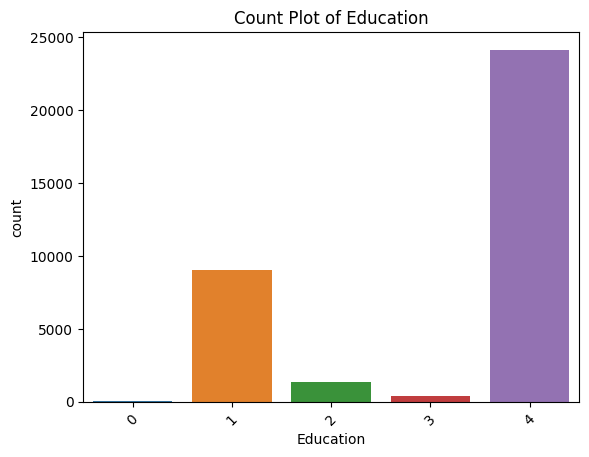

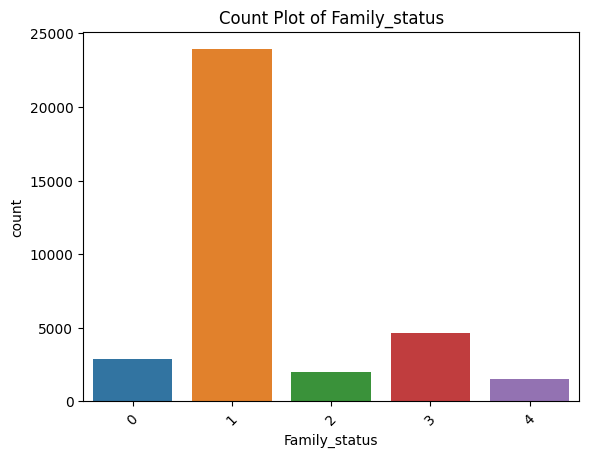

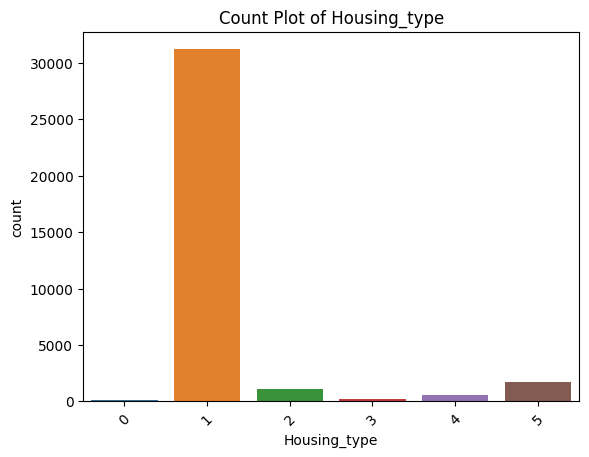

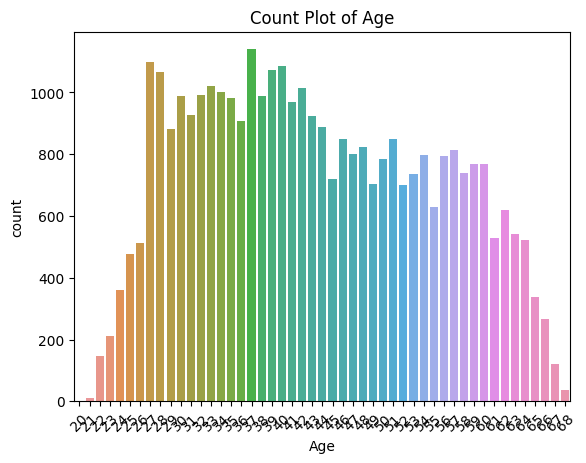

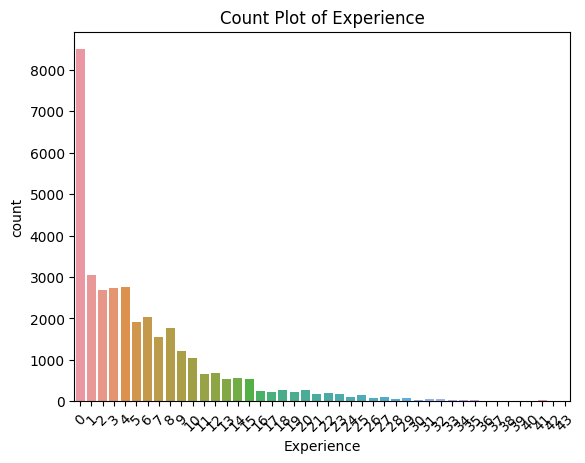

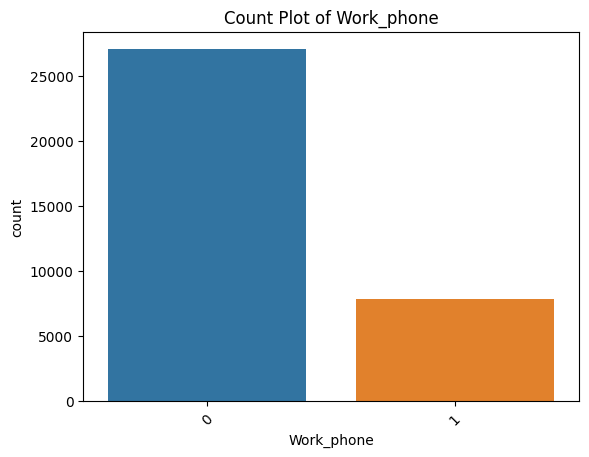

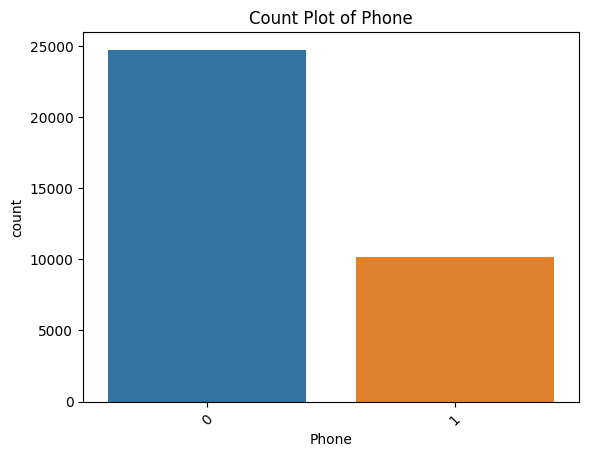

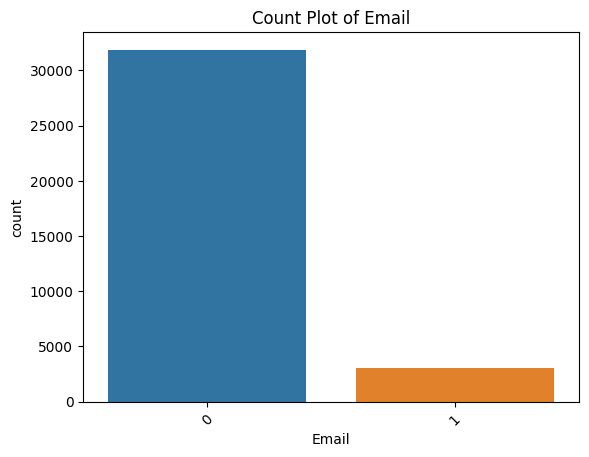

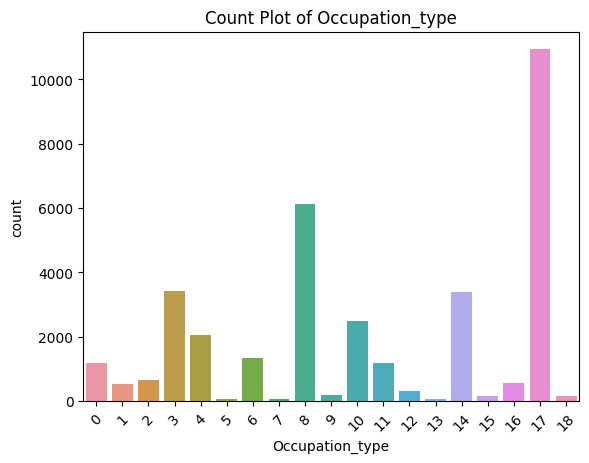

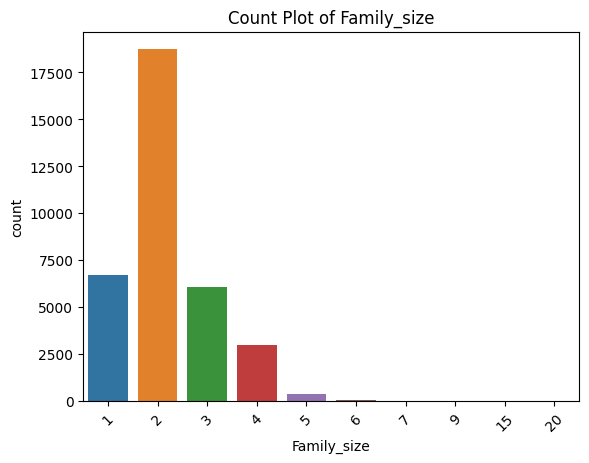

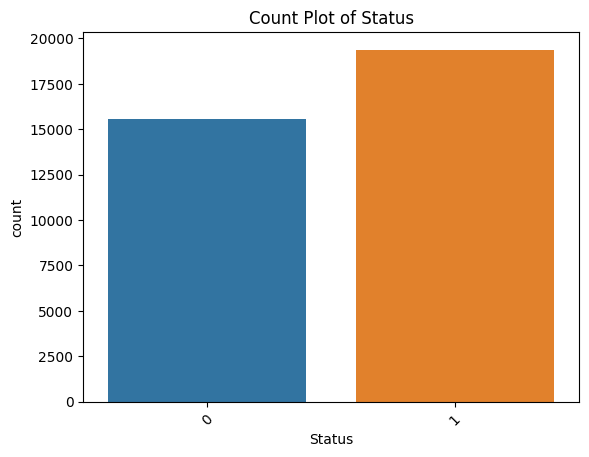

In [59]:
categorical_features = df.select_dtypes(include=['int64']).drop('ID', axis=1)
plt.figure(figsize=(12, 8))
for column in categorical_features.columns:
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
    plt.show()


In [60]:
# sns.pairplot(data=df, diag_kind='kde')
# plt.show()

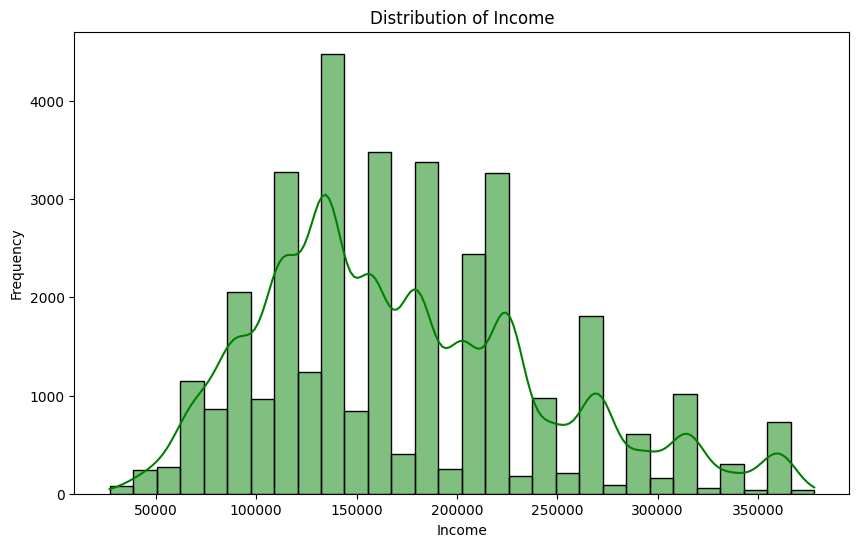

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', bins=30, kde=True, color='green')
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

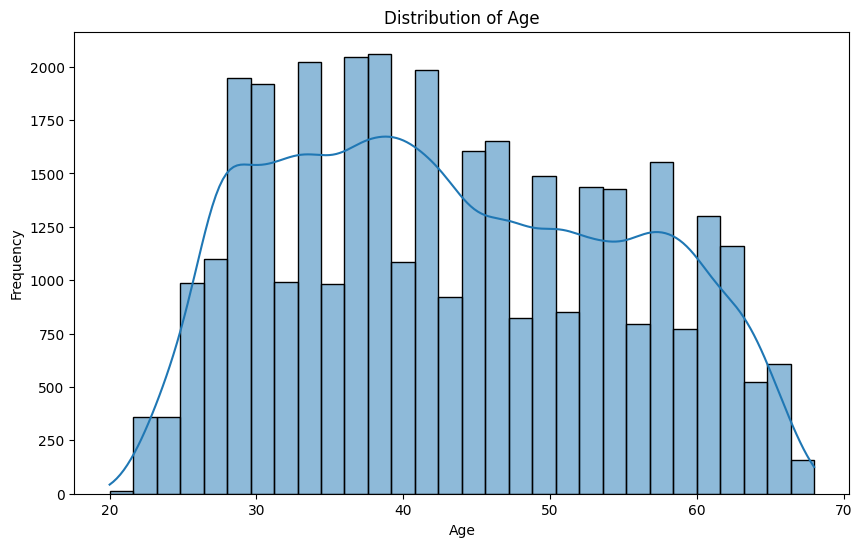

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


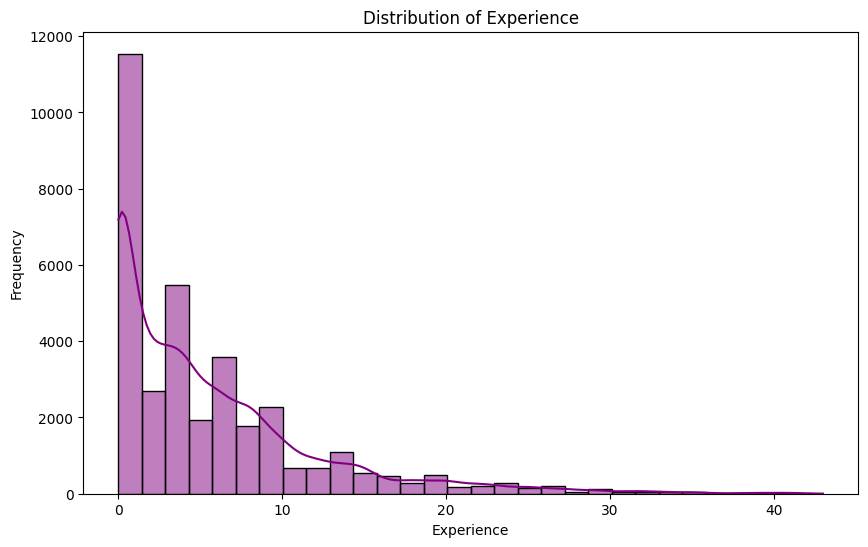

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Experience', bins=30, kde=True, color='purple')
plt.title("Distribution of Experience")
plt.xlabel("Experience")
plt.ylabel("Frequency")
plt.show()


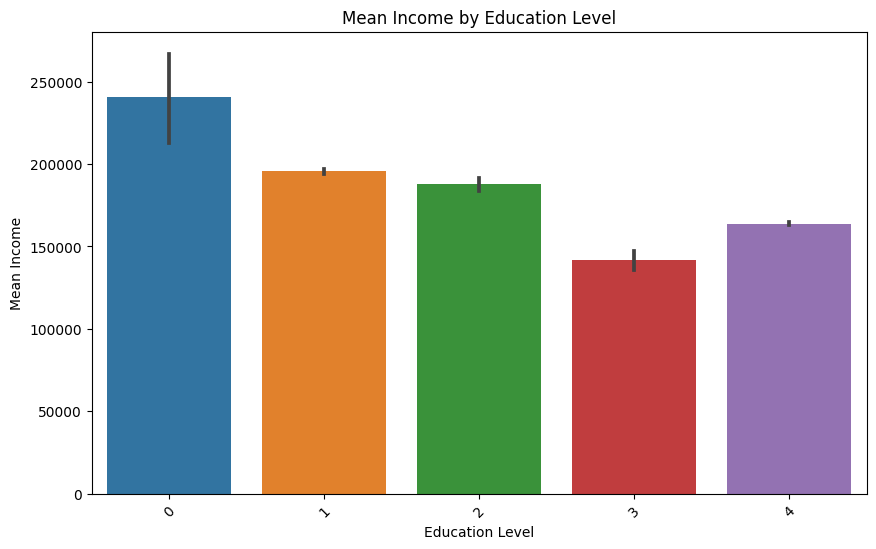

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Education', y='Income', estimator='mean')
plt.title("Mean Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Mean Income")
plt.xticks(rotation=45)
plt.show()


#### Dropping Housing_type on the basis of EDA as it majorly has only one type of values. Simlarly dropping email column as well as it is dominated by people who don't have email

In [65]:
df.drop(columns=['Housing_type'], inplace=True)

In [66]:
df.drop(columns=['Email'], inplace=True)

In [67]:
df = df.drop(['Phone', 'Work_phone','Own_car'], axis=1) # Dropped on the basis of domain knowledge

In [68]:
from sklearn.model_selection import train_test_split
# x = df.drop(['ID','Status'],axis = 1)
x = df.drop(['ID','Status','Good_Rate'],axis = 1)
y = df['Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)


In [69]:
from imblearn.over_sampling import SMOTE , ADASYN
sm = ADASYN()
x_train, y_train = sm.fit_resample(x_train,y_train)

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [70]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')
x_train = power.fit_transform(x_train)
x_test = power.fit_transform(x_test)

In [71]:
from sklearn import preprocessing
normalizer = preprocessing.StandardScaler()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.fit_transform(x_test)


In [72]:
df.head(10)

,ID,Gender,Own_property,Income,Income_source,Education,Family_status,Age,Experience,Occupation_type,Family_size,Status,Good_Rate
0,5008806,1,1,112500.0,4,4,1,58,3,16,2,1,0.77
1,5008808,0,1,270000.0,0,4,3,52,8,14,1,1,0.67
2,5008809,0,1,270000.0,0,4,3,52,8,14,1,1,1.00
3,5008810,0,1,270000.0,0,4,3,52,8,14,1,1,0.79
4,5008811,0,1,270000.0,0,4,3,52,8,14,1,1,0.85
5,5008812,0,1,283500.0,1,1,2,61,0,17,1,0,0.22
6,5008813,0,1,283500.0,1,1,2,61,0,17,1,0,0.22
7,5008814,0,1,283500.0,1,1,2,61,0,17,1,0,0.22
8,5008815,1,1,270000.0,4,1,1,46,2,0,2,0,0.14
9,5112956,1,1,270000.0,4,1,1,46,2,0,2,0,0.20


## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a model on the resampled data
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model_rf.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6485828800458059


## Hyper tuning the RF model

In [74]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score


# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # Create a Random Forest classifier instance
# model_rf = RandomForestClassifier()

# # Create GridSearchCV instance
# grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='accuracy', cv=5)

# # Fit GridSearchCV
# grid_search.fit(x_train, y_train)

# # Get best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Evaluate on validation set
# y_pred_test = best_model.predict(x_test)
# val_accuracy = accuracy_score(y_test, y_pred_test)

# print("Best Parameters:", best_params)
# print("Accuracy:", val_accuracy)


In [75]:
def Train_test(model):
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)

    # Calculate accuracy for train and test predictions
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

In [76]:
Train_test(model_rf)

Train Accuracy: 0.81
Test Accuracy: 0.65


## Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
model_nb = GaussianNB()

# Train the model on the training data
model_nb.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model_nb.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.509447466361294


In [78]:
Train_test(model_nb)

Train Accuracy: 0.52
Test Accuracy: 0.51


## XGBoost

In [79]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
model_xgb = XGBClassifier(random_state=42)

# Train the model on the training data
model_xgb.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model_xgb.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6037789865445176


In [80]:
Train_test(model_xgb)

Train Accuracy: 0.71
Test Accuracy: 0.60


## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model_lr = LogisticRegression(random_state=5000)

# Train the model on the training data
model_lr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model_lr.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.49985685657028345


In [82]:
Train_test(model_lr)

Train Accuracy: 0.52
Test Accuracy: 0.50


## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model_dt.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model_dt.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6494417406241053


In [84]:
Train_test(model_dt)

Train Accuracy: 0.81
Test Accuracy: 0.65


## MLP

In [85]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(verbose = 0 , max_iter = 5 , random_state = 0)
model_mlp.fit(x_train, y_train)
y_predict = model_mlp.predict(x_test)
print("Accuracy = " , accuracy_score(y_test, y_predict))

Accuracy =  0.5251932436301173


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
Train_test(model_mlp)

Train Accuracy: 0.55
Test Accuracy: 0.53


## Evaluation of Models

In [87]:
def evaluate_model(model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    y_true = y_test
    y_pred = model.predict(x_test)
    
    accuracy = f"{accuracy_score(y_test, y_pred):0.2f}"
    precision = f"{precision_score(y_test, y_pred):0.2f}"
    recall = f"{recall_score(y_test, y_pred):0.2f}"
    f1 = f"{f1_score(y_test, y_pred):0.2f}"
    
    return accuracy, precision, recall, f1

In [88]:
models = [
    {"name": "RF", "model": model_rf},
    {"name": "NB", "model": model_nb},
    {"name": "XGB", "model": model_xgb},
    {"name": "LR", "model": model_lr},
    {"name": "DT", "model": model_dt},
    {"name": "MLP", "model": model_mlp}

]

print('-' * 72)
print(f"|{'Algo':^10}|{'Accuracy':^15}|{'Precision':^15}|{'Recall':^15}|{'F1':^10}|")
print('-' * 72)
for model_info in models:
    evaluation = evaluate_model(model_info['model'])
    print(f"|{model_info['name']:^10}|{evaluation[0]:^15}|{evaluation[1]:^15}|{evaluation[2]:^15}|{evaluation[3]:^10}|")
    
print('-' * 72)

------------------------------------------------------------------------
|   Algo   |   Accuracy    |   Precision   |    Recall     |    F1    |
------------------------------------------------------------------------
|    RF    |     0.65      |     0.68      |     0.69      |   0.68   |
|    NB    |     0.51      |     0.56      |     0.51      |   0.53   |
|   XGB    |     0.60      |     0.64      |     0.64      |   0.64   |
|    LR    |     0.50      |     0.55      |     0.48      |   0.51   |
|    DT    |     0.65      |     0.69      |     0.65      |   0.67   |
|   MLP    |     0.53      |     0.58      |     0.51      |   0.54   |
------------------------------------------------------------------------


In [89]:
import pickle

with open("modelRF_NORATE.pkl", 'wb') as file:
    pickle.dump(model_rf, file)
    


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34928 entries, 0 to 34927
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               34928 non-null  int64  
 1   Gender           34928 non-null  int64  
 2   Own_property     34928 non-null  int64  
 3   Income           34928 non-null  float64
 4   Income_source    34928 non-null  int64  
 5   Education        34928 non-null  int64  
 6   Family_status    34928 non-null  int64  
 7   Age              34928 non-null  int64  
 8   Experience       34928 non-null  int64  
 9   Occupation_type  34928 non-null  int64  
 10  Family_size      34928 non-null  int64  
 11  Status           34928 non-null  int64  
 12  Good_Rate        34928 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 3.7 MB


In [277]:
df.columns.tolist()

['ID',
 'Gender',
 'Own_property',
 'Income',
 'Income_source',
 'Education',
 'Family_status',
 'Age',
 'Experience',
 'Occupation_type',
 'Family_size',
 'Status',
 'Good_Rate']